In [11]:
#### Lending Club Case Study ###
## DATA Sourcing

# Importhe csv file which needs analyzed
# once after importing the data, verfiy whether data's are imported properly

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
df = pd.read_csv("C:\Lending_Class\loan\loan1.csv")
df

C:\Users\vvenugop\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df["emp_length"].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [15]:
## Data cleaning

# delete the rows where the column contains the NAN values
# By cleaning this table about 45 columns would be removed
# it make the analysis little bit handy
# lets use df_1 dataframe for our analysis

In [85]:
cols_to_ignore = ['emp_length']
#df_1=df.dropna(axis=1)
df_1=df.dropna(axis=1,how='all')
df_1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [ ]:
## Data Sourcing - 2
# lets try to understand the columns usage
# data types of the column

In [86]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [22]:
## Data sourcing - 2
# Describing the column values
# where we can get the mean, median, max information of
# loan_amnt, funded_amnt, annual_inc  

In [87]:
df_1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.000000,39717.000000,39717.000000,39661.000000,39717.000000,39020.000000,39678.000000
mean,683131.913060,850463.559408,11219.443815,10947.713196,10397.448868,324.561922,68968.926377,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.000000,1.000000,0.000000,0.000000,0.000000,0.043260,0.000000
std,210694.132915,265678.307421,7456.670694,7187.238670,7128.450439,208.874874,63793.765790,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.000000,0.000000,0.000000,0.000000,0.000000,0.204324,0.000000
min,54734.000000,70699.000000,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,516221.000000,666780.000000,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,665665.000000,850812.000000,10000.000000,9600.000000,8975.000000,280.220000,59000.000000,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,837755.000000,1047339.000000,15000.000000,15000.000000,14400.000000,430.780000,82300.000000,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1077501.000000,1314167.000000,35000.000000,35000.000000,35000.000000,1305.190000,6000000.000000,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000


In [27]:
# nunique query is used just to understand unique counts on different columns
df_1.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
url                        39717
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
total_acc                     82
initial_list_status            1
out_prncp                   1137
out_prncp_

In [54]:
### From the cleaned data 
# Max Annual_income is 60 lac
# also we got the details of loan history of the clients

In [50]:
df_1["annual_inc"].describe().apply(lambda x: format(x, 'f'))

count      39717.000000
mean       68968.926377
std        63793.765790
min         4000.000000
25%        40404.000000
50%        59000.000000
75%        82300.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [88]:
df_1["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [ ]:
#### EDA : Explanatory Data Analysis
# from the above annual data, very very few employees earns 60 Lacs
# this will lay outlayres
# now lets us find the out layers

<AxesSubplot:xlabel='annual_inc'>

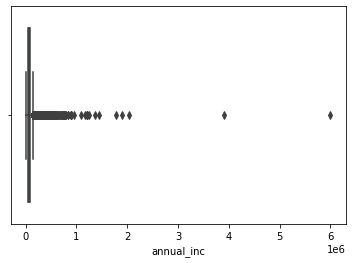

In [89]:
sns.boxplot(x=df_1["annual_inc"])

In [ ]:
## from the above out layers chart, 
# Max number of employees are earning less than 10 Lacs
# calculating loan eligibililty based on annual income will not give oppertunity to the employess having less annual income 
# compared to the max earner.

### Considering the employees who are earing more than 12 lacs as outliers
# Now our dataframe is df_2


In [90]:
df_2=df_1.drop(df_1[df_1['annual_inc']>=1200000].index)
df_2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [91]:
df_2["annual_inc"].describe().apply(lambda x: format(x, 'f'))

count      39705.000000
mean       68373.380303
std        48012.932149
min         4000.000000
25%        40320.000000
50%        59000.000000
75%        82140.000000
max      1176000.000000
Name: annual_inc, dtype: object

In [ ]:
### Univariate Analysis
# Get the chart for Verified users
# Get the char for loan_status

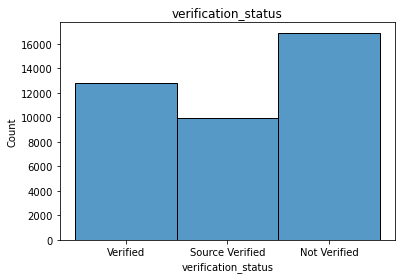

In [92]:
sns.histplot(df_2["verification_status"])
plt.title("verification_status")
plt.show()

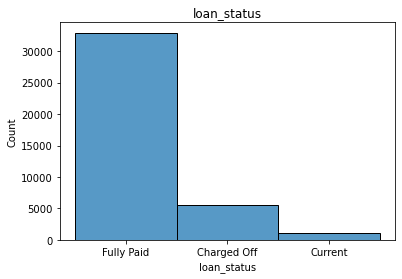

In [93]:
sns.histplot(df_2["loan_status"])
plt.title("loan_status")
plt.show()

In [ ]:
## Analysis made between the loan_status with respect to verification_status
# this is to understand how many verified user are not defaulters
# We can see max number of applicants are paid their depts promptly irrespective of verification status

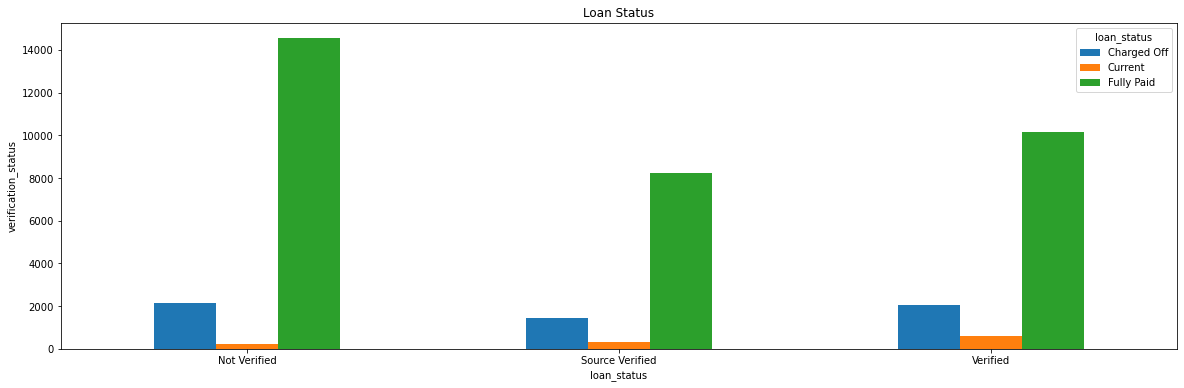

In [70]:
pd.crosstab(df_2.verification_status,df_2.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan Status')
plt.xlabel('loan_status')
plt.ylabel('verification_status')
plt.xticks(rotation =0)
plt.savefig('Loan status.png')
plt.show()

In [ ]:
# In the below Bar plots with respect to Annual_Income and Loan_status along with candiates work experience
# We can see higer number of applicants paid fully, at the same time we can notice quitly some high defaulters in all exp levels.
# in such case we can have trade-off for charged_off canditates

<AxesSubplot:xlabel='emp_length'>

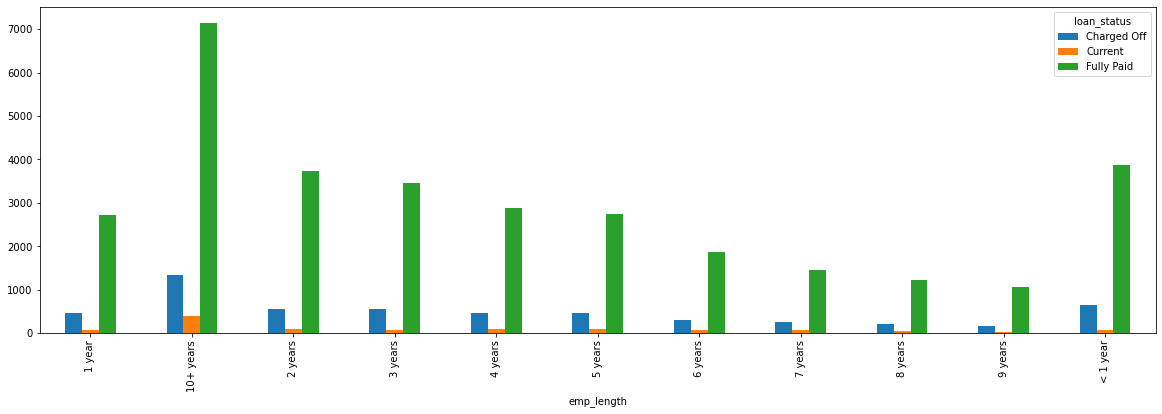

In [113]:
pd.crosstab(df_2.emp_length,df_2.loan_status).plot(kind="bar",figsize=(20,6))

In [114]:
# The trade-off for applicants having charged_off value can be set,
# the loan sanction can be considered for the applicants who are haveing >60K as annual income with trade-off condition
### Condtions
# 1. defaulters : missed payment not more than 3 monthts
# 2. Current loan : 40% of (applicants monthly_income - current_emi)
# 3. Fully Paid : requested amount can be granted

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

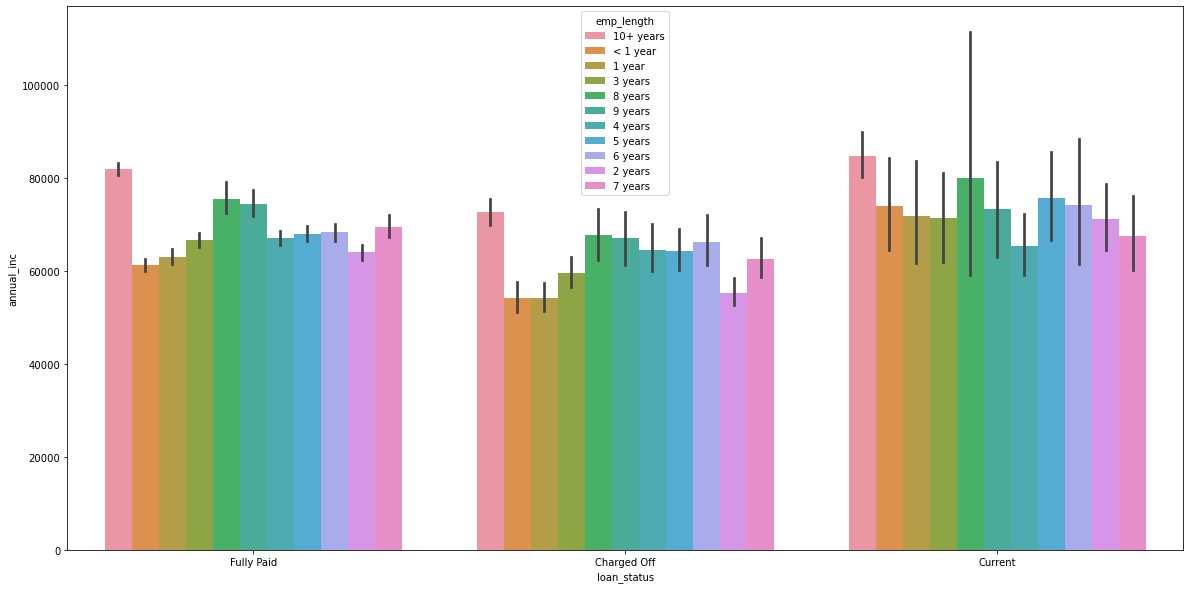

In [112]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_2["loan_status"],y=df_2["annual_inc"], hue=df_2["emp_length"])
#sns.barplot(x=df_2["emp_length"],y=df_2["annual_inc"])

In [ ]:
## From the below gragh we can notice loan recovery is high for Balance Transfer applicants

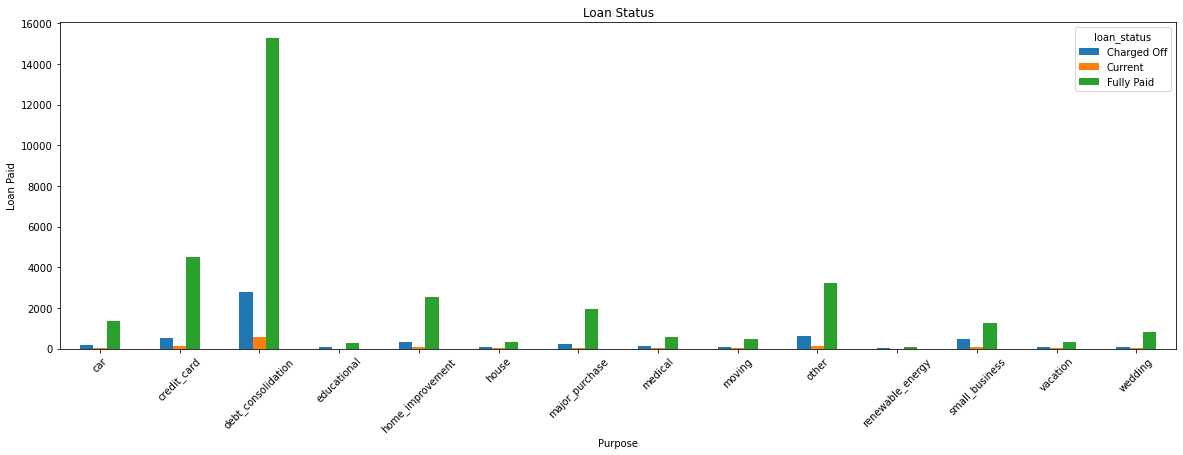

In [116]:
pd.crosstab(df_2.purpose,df_2.loan_status).plot(kind="bar",figsize=(20,6))
plt.title('Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Loan Paid')
plt.xticks(rotation =45)
plt.show()

<AxesSubplot:xlabel='emp_length', ylabel='purpose'>

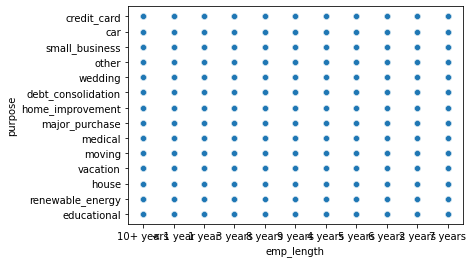

In [125]:
sns.scatterplot(x=df_2["emp_length"],y=df_2["purpose"])